# Cartola FC EDA e Clusterização dos jogadores

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importando a base

In [2]:
cartola_df = pd.read_csv('/kaggle/input/cartola-2022-round-38-totals/cartola.csv')

## Analisando a base

In [3]:
cartola_df.shape

(834, 38)

In [4]:
cartola_df.head()

,Unnamed: 0,atletas.apelido,atletas.apelido_abreviado,atletas.slug,atletas.jogos_num,atletas.posicao_id,atletas.preco_num,atletas.clube_id,atletas.foto,atletas.status_id,...,A,FD,PC,FT,PS,DE,GS,GC,PP,DP
0,0,Celso Roth,C. Roth,celso-roth,4,6,5.75,286,https://s.sde.globo.com/media/person_role/2022...,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Guto Ferreira,G. Ferreira,guto-ferreira,15,6,10.74,294,https://s.glbimg.com/es/sde/f/2021/04/27/7b5d6...,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mano Menezes,M. Menezes,mano-menezes,34,6,10.78,285,https://s.glbimg.com/es/sde/f/2022/04/20/e2710...,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Fábio,Fábio,fabio,37,1,11.21,266,https://s.glbimg.com/es/sde/f/2022/04/20/aeae6...,7,...,NaN,NaN,NaN,NaN,NaN,110.0,41.0,NaN,NaN,NaN
4,4,Marcelo Boeck,M. Boeck,marcelo-boeck,12,1,4.64,356,https://s.glbimg.com/es/sde/f/2022/02/23/34de1...,6,...,NaN,NaN,1.0,NaN,NaN,38.0,17.0,NaN,NaN,NaN


In [5]:
cartola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     834 non-null    int64  
 1   atletas.apelido                834 non-null    object 
 2   atletas.apelido_abreviado      834 non-null    object 
 3   atletas.slug                   834 non-null    object 
 4   atletas.jogos_num              834 non-null    int64  
 5   atletas.posicao_id             834 non-null    int64  
 6   atletas.preco_num              834 non-null    float64
 7   atletas.clube_id               834 non-null    int64  
 8   atletas.foto                   820 non-null    object 
 9   atletas.status_id              834 non-null    int64  
 10  atletas.nome                   834 non-null    object 
 11  atletas.media_num              834 non-null    float64
 12  atletas.variacao_num           834 non-null    flo

In [6]:
cartola_df.describe()

,Unnamed: 0,atletas.jogos_num,atletas.posicao_id,atletas.preco_num,atletas.clube_id,atletas.status_id,atletas.media_num,atletas.variacao_num,atletas.rodada_id,atletas.atleta_id,...,A,FD,PC,FT,PS,DE,GS,GC,PP,DP
count,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.0,834.000000,...,253.000000,432.000000,94.000000,147.000000,66.000000,48.000000,45.000000,14.0,24.000000,13.000000
mean,416.500000,13.446043,3.472422,4.484233,342.387290,6.127098,2.105612,0.000012,38.0,95383.794964,...,2.094862,5.157407,1.234043,1.537415,1.272727,48.520833,18.600000,1.0,1.041667,1.384615
std,240.899357,11.495501,1.356973,3.238587,223.933889,0.720584,1.793233,0.474409,0.0,19110.242498,...,1.632657,5.037515,0.556980,0.930989,0.755400,41.799414,14.852915,0.0,0.204124,0.506370
min,0.000000,0.000000,1.000000,0.660000,262.000000,3.000000,-2.200000,-3.620000,38.0,36856.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
25%,208.250000,1.000000,2.000000,2.000000,275.000000,6.000000,0.472500,0.000000,38.0,86173.250000,...,1.000000,2.000000,1.000000,1.000000,1.000000,8.750000,5.000000,1.0,1.000000,1.000000
50%,416.500000,12.000000,4.000000,3.810000,286.000000,6.000000,1.955000,0.000000,38.0,101284.000000,...,2.000000,3.000000,1.000000,1.000000,1.000000,41.500000,16.000000,1.0,1.000000,1.000000
75%,624.750000,24.000000,5.000000,6.260000,314.000000,7.000000,3.390000,0.000000,38.0,109198.000000,...,3.000000,6.250000,1.000000,2.000000,1.000000,78.500000,27.000000,1.0,1.000000,2.000000
max,833.000000,38.000000,6.000000,22.160000,1371.000000,7.000000,9.770000,2.340000,38.0,121400.000000,...,14.000000,36.000000,4.000000,6.000000,5.000000,154.000000,55.000000,1.0,2.000000,2.000000


## Transformando a posição do jogadores

In [7]:
cartola_df[cartola_df['atletas.posicao_id'] == 5]

,Unnamed: 0,atletas.apelido,atletas.apelido_abreviado,atletas.slug,atletas.jogos_num,atletas.posicao_id,atletas.preco_num,atletas.clube_id,atletas.foto,atletas.status_id,...,A,FD,PC,FT,PS,DE,GS,GC,PP,DP
6,6,Jô,Jô,jo,15,5,4.62,354,https://s.glbimg.com/es/sde/f/2022/08/11/f19c5...,6,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
9,9,Muriqui,Muriqui,muriqui,25,5,8.36,314,https://s.glbimg.com/es/sde/f/2022/02/24/4df18...,6,...,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
11,11,Wellington Paulista,W. Paulista,wellington-paulista,19,5,4.02,327,https://s.glbimg.com/es/sde/f/2022/02/25/12f12...,6,...,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
20,20,Hulk,Hulk,hulk,25,5,18.99,282,https://s.sde.globo.com/media/person_role/2022...,5,...,2.0,17.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
24,24,Willian,Willian,willian,28,5,4.11,266,https://s.glbimg.com/es/sde/f/2022/04/20/49ddf...,6,...,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,818,Ruan,Ruan,ruan,10,5,1.25,286,https://storage.googleapis.com/bkt-gglobo-sde-...,7,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,823,Vinícius Boff,V. Boff,vinicius-boff,1,5,2.02,1371,https://s.sde.globo.com/media/person_role/2022...,6,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824,824,Arthur Sousa,A. Sousa,arthur-sousa,1,5,1.29,264,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
828,828,Felipinho,Felipinho,felipinho,1,5,1.49,314,NaN,6,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cartola_df['posicao_sigla'] = pd.Series()

for i in cartola_df.index:
  if cartola_df['atletas.posicao_id'][i] == 1:
    cartola_df['posicao_sigla'][i] = 'G'
  elif cartola_df['atletas.posicao_id'][i] == 2:
    cartola_df['posicao_sigla'][i] = 'L'
  elif cartola_df['atletas.posicao_id'][i] == 3:
    cartola_df['posicao_sigla'][i] = 'Z'
  elif cartola_df['atletas.posicao_id'][i] == 4:
    cartola_df['posicao_sigla'][i] = 'M'
  elif cartola_df['atletas.posicao_id'][i] == 5:
    cartola_df['posicao_sigla'][i] = 'A'
  elif cartola_df['atletas.posicao_id'][i] == 6:
    cartola_df['posicao_sigla'][i] = 'T'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


##  Calculando a pontuação total dos jogadores

In [9]:
cartola_df['pontuacao_total'] = pd.Series()

for i in cartola_df.index:
  cartola_df['pontuacao_total'][i] = cartola_df['atletas.jogos_num'][i] * cartola_df['atletas.media_num'][i]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
cartola_df.head()

,Unnamed: 0,atletas.apelido,atletas.apelido_abreviado,atletas.slug,atletas.jogos_num,atletas.posicao_id,atletas.preco_num,atletas.clube_id,atletas.foto,atletas.status_id,...,PC,FT,PS,DE,GS,GC,PP,DP,posicao_sigla,pontuacao_total
0,0,Celso Roth,C. Roth,celso-roth,4,6,5.75,286,https://s.sde.globo.com/media/person_role/2022...,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,10.16
1,1,Guto Ferreira,G. Ferreira,guto-ferreira,15,6,10.74,294,https://s.glbimg.com/es/sde/f/2021/04/27/7b5d6...,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,63.15
2,2,Mano Menezes,M. Menezes,mano-menezes,34,6,10.78,285,https://s.glbimg.com/es/sde/f/2022/04/20/e2710...,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,176.46
3,3,Fábio,Fábio,fabio,37,1,11.21,266,https://s.glbimg.com/es/sde/f/2022/04/20/aeae6...,7,...,NaN,NaN,NaN,110.0,41.0,NaN,NaN,NaN,G,134.68
4,4,Marcelo Boeck,M. Boeck,marcelo-boeck,12,1,4.64,356,https://s.glbimg.com/es/sde/f/2022/02/23/34de1...,6,...,1.0,NaN,NaN,38.0,17.0,NaN,NaN,NaN,G,34.44


## Limpando a base

In [11]:
cartola_df.drop(['Unnamed: 0', 'atletas.clube_id', 'atletas.status_id', 'atletas.posicao_id', 'atletas.rodada_id', 'atletas.atleta_id', 'atletas.foto'], axis=1, inplace=True)

In [12]:
cartola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   atletas.apelido                834 non-null    object 
 1   atletas.apelido_abreviado      834 non-null    object 
 2   atletas.slug                   834 non-null    object 
 3   atletas.jogos_num              834 non-null    int64  
 4   atletas.preco_num              834 non-null    float64
 5   atletas.nome                   834 non-null    object 
 6   atletas.media_num              834 non-null    float64
 7   atletas.variacao_num           834 non-null    float64
 8   atletas.clube.id.full.name     834 non-null    object 
 9   atletas.pontos_num             834 non-null    float64
 10  atletas.minimo_para_valorizar  829 non-null    float64
 11  CA                             502 non-null    float64
 12  DS                             579 non-null    flo

Dicionário de dados

*   atletas.apelido = Apelido do jogador
*   atletas.apelido_abreviado = Abreviação do nome do jogador
*   atleta.slug = Slug com o nome do jogador
*   posicao_sigla = Posição do jogador
*   atletas.jogos_num = Total de jogos do atleta
*   atletas.preco_num = Preço do jogador naquela rodada
*   atletas.nome = Nome do jogador
*   atletas.media_num = Média de pontuação do jogador
*   atletas.variacao_num = Variação de uma rodada para outra no preço
*   atletas.clube.id.full.name = Nome do clube
*   atletas.pontos_num = Pontuação na rodada
*   atletas.minimo_para_valorizar = Minimo necessário para valorizar
*   pontuacao_total = Pontuação total do jogador
*   CA = Cartões Amarelos
*   DS = Desarmes
*   FC = Faltas cometidas
*   PI = Passes incompletos
*   SG = Saldo de gols
*   CV = Cartões vermelhos
*   FF = Finalizações para fora
*   FS = Faltas Sofridas
*   G = Gols
*   I = Impedimentos
*   A = Assistências
*   FD = Finalizações defendidas
*   PC = Penaltis cometidos
*   FT = Finalizações na trave
*   PS = Penaltis sofridos
*   DE = Defesas
*   GS = Gols sofridos
*   GC = Gols contra
*   PP = Penaltis perdidos
*   DP = Defesas de penaltis




## Removendo jogadores que não possuem pelo menos 10 jogos

In [13]:
rows = cartola_df[cartola_df['atletas.jogos_num'] < 10].index
rows

Int64Index([  0,   5,  14,  16,  17,  33,  35,  52,  57,  68,
            ...
            824, 825, 826, 827, 828, 829, 830, 831, 832, 833],
           dtype='int64', length=367)

In [14]:
cartola_df.drop(rows, axis=0, inplace=True)

## Lidando com valores nulos

In [15]:
cartola_df.isna().sum()

atletas.apelido                    0
atletas.apelido_abreviado          0
atletas.slug                       0
atletas.jogos_num                  0
atletas.preco_num                  0
atletas.nome                       0
atletas.media_num                  0
atletas.variacao_num               0
atletas.clube.id.full.name         0
atletas.pontos_num                 0
atletas.minimo_para_valorizar      0
CA                                52
DS                                29
FC                                44
PI                                44
SG                               294
CV                               386
FF                                61
FS                                19
G                                227
I                                203
A                                230
FD                                99
PC                               386
FT                               329
PS                               407
DE                               439
G

In [16]:
cartola_df.fillna(0, inplace=True)

In [17]:
cartola_df.isna().sum()

atletas.apelido                  0
atletas.apelido_abreviado        0
atletas.slug                     0
atletas.jogos_num                0
atletas.preco_num                0
atletas.nome                     0
atletas.media_num                0
atletas.variacao_num             0
atletas.clube.id.full.name       0
atletas.pontos_num               0
atletas.minimo_para_valorizar    0
CA                               0
DS                               0
FC                               0
PI                               0
SG                               0
CV                               0
FF                               0
FS                               0
G                                0
I                                0
A                                0
FD                               0
PC                               0
FT                               0
PS                               0
DE                               0
GS                               0
GC                  

In [18]:
cartola_df.head()

,atletas.apelido,atletas.apelido_abreviado,atletas.slug,atletas.jogos_num,atletas.preco_num,atletas.nome,atletas.media_num,atletas.variacao_num,atletas.clube.id.full.name,atletas.pontos_num,...,PC,FT,PS,DE,GS,GC,PP,DP,posicao_sigla,pontuacao_total
1,Guto Ferreira,G. Ferreira,guto-ferreira,15,10.74,Augusto Sérgio Ferreira,4.21,0.08,Coritiba,3.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T,63.15
2,Mano Menezes,M. Menezes,mano-menezes,34,10.78,Luis Antônio Venker de Menezes,5.19,0.05,Internacional,8.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T,176.46
3,Fábio,Fábio,fabio,37,11.21,Fábio Deivson Lopes Maciel,3.64,0.63,Fluminense,9.50,...,0.0,0.0,0.0,110.0,41.0,0.0,0.0,0.0,G,134.68
4,Marcelo Boeck,M. Boeck,marcelo-boeck,12,4.64,Marcelo Boeck,2.87,0.00,Fortaleza,0.00,...,1.0,0.0,0.0,38.0,17.0,0.0,0.0,0.0,G,34.44
6,Jô,Jô,jo,15,4.62,João Alves de Assis Silva,2.21,0.00,Ceará,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,A,33.15


<AxesSubplot:>

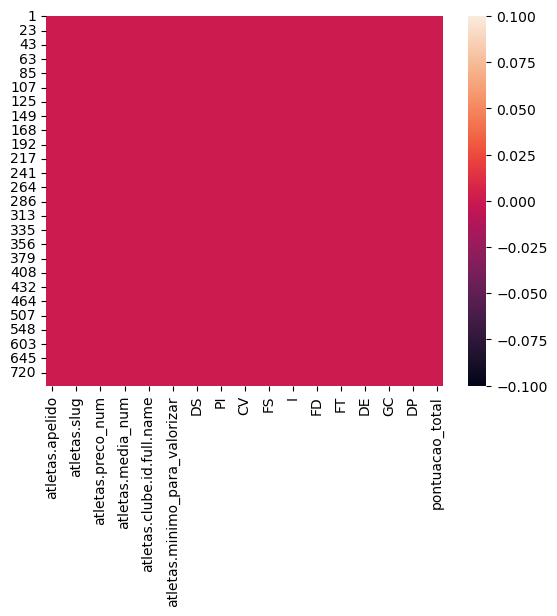

In [19]:
sns.heatmap(cartola_df.isna())

 ## Explorando os dados

array([[<AxesSubplot:title={'center':'atletas.jogos_num'}>,
        <AxesSubplot:title={'center':'atletas.preco_num'}>,
        <AxesSubplot:title={'center':'atletas.media_num'}>,
        <AxesSubplot:title={'center':'atletas.variacao_num'}>,
        <AxesSubplot:title={'center':'atletas.pontos_num'}>],
       [<AxesSubplot:title={'center':'atletas.minimo_para_valorizar'}>,
        <AxesSubplot:title={'center':'CA'}>,
        <AxesSubplot:title={'center':'DS'}>,
        <AxesSubplot:title={'center':'FC'}>,
        <AxesSubplot:title={'center':'PI'}>],
       [<AxesSubplot:title={'center':'SG'}>,
        <AxesSubplot:title={'center':'CV'}>,
        <AxesSubplot:title={'center':'FF'}>,
        <AxesSubplot:title={'center':'FS'}>,
        <AxesSubplot:title={'center':'G'}>],
       [<AxesSubplot:title={'center':'I'}>,
        <AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'FD'}>,
        <AxesSubplot:title={'center':'PC'}>,
        <AxesSubplot:title={'center':'F

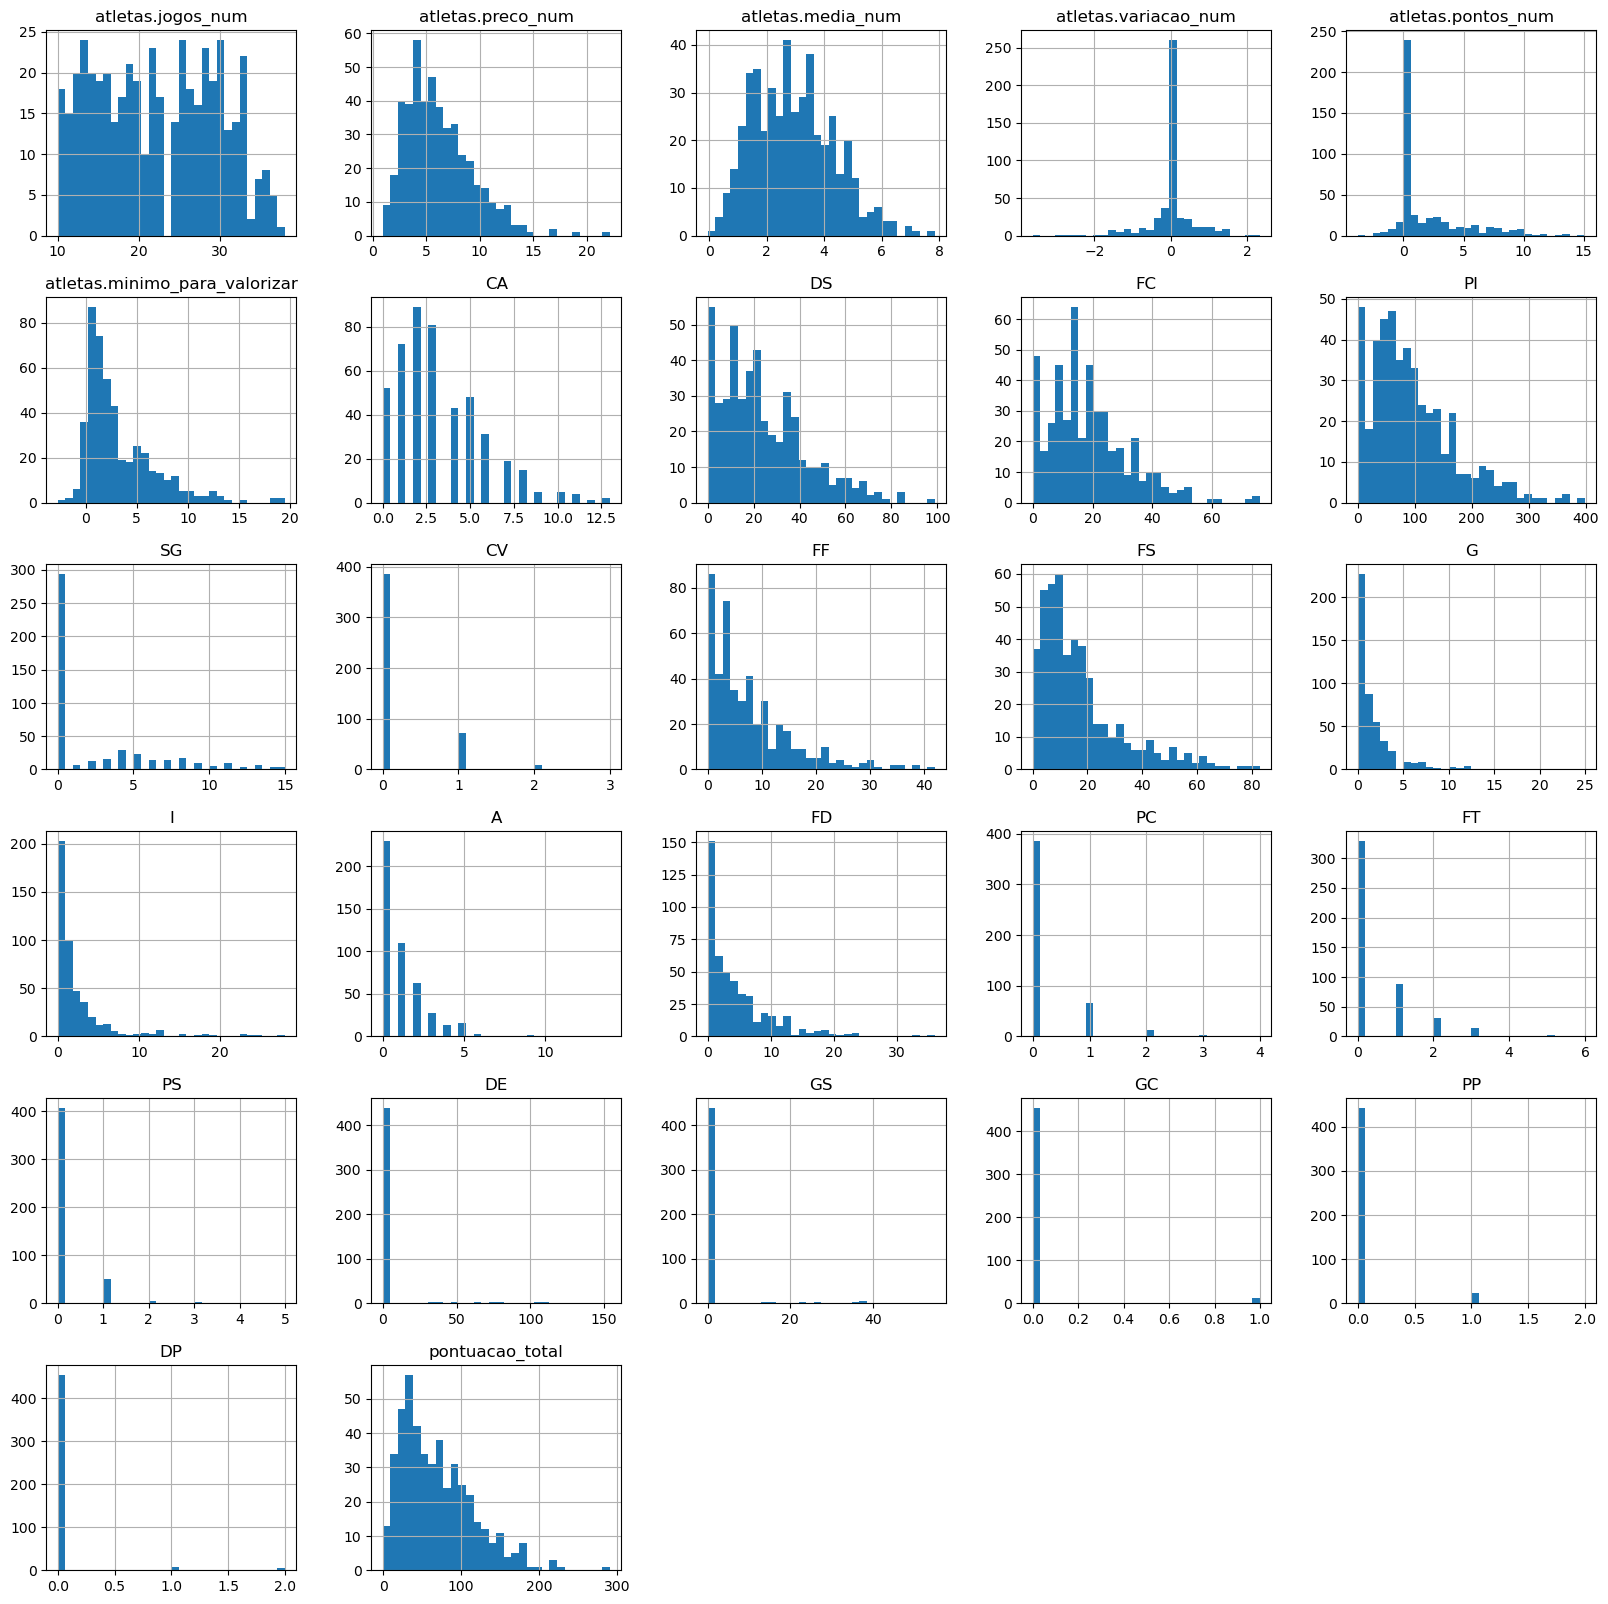

In [20]:
cartola_df.hist(bins=30, figsize=(20, 20))

<AxesSubplot:>

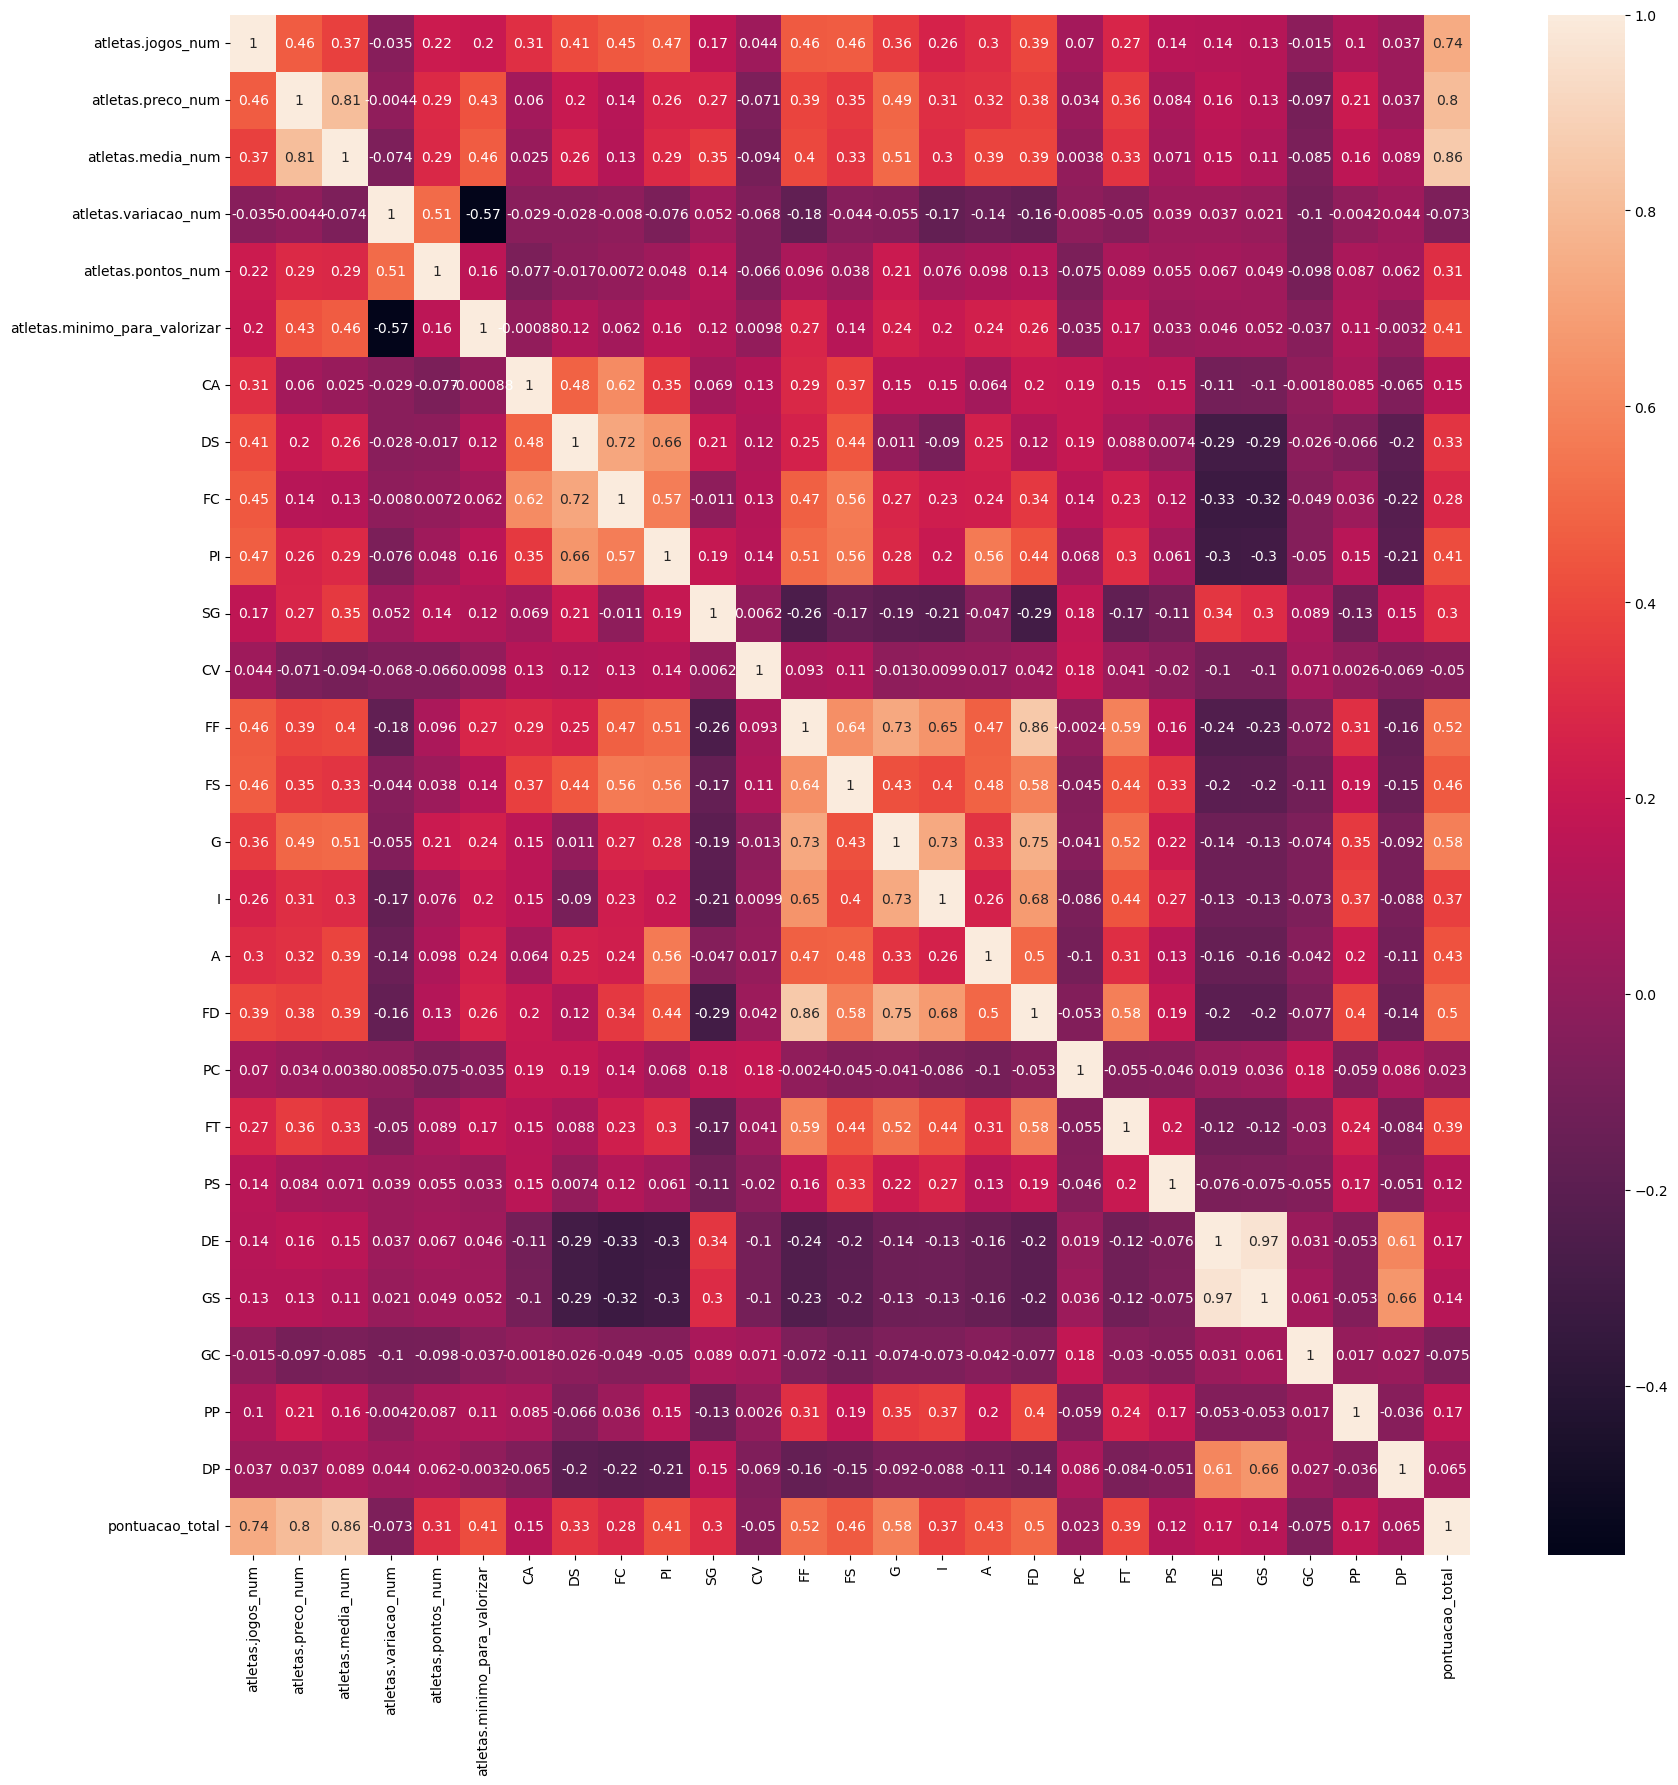

In [21]:
correlations = cartola_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

Text(0.5, 1.0, 'Média de gols por posição')

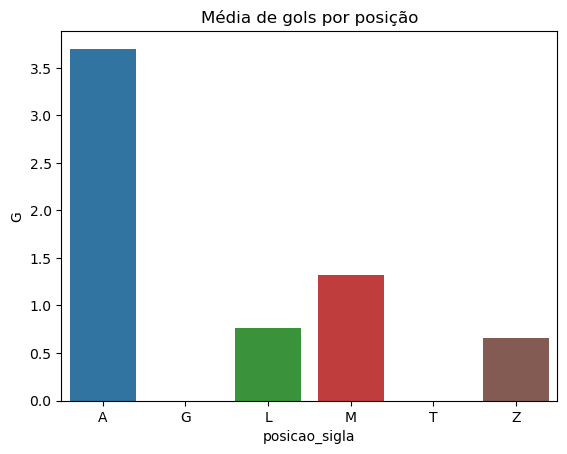

In [22]:
mean_gols_df = cartola_df.groupby('posicao_sigla')[['G']].mean().reset_index()
sns.barplot(data=mean_gols_df, x='posicao_sigla', y='G')
plt.title('Média de gols por posição')

Text(0.5, 1.0, 'Média de assistências por posição')

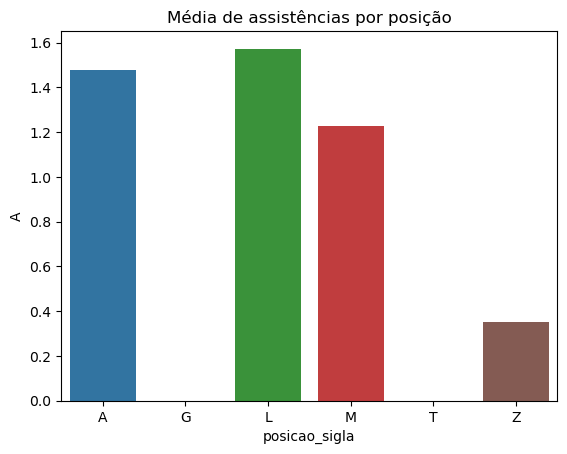

In [23]:
mean_assis_df = cartola_df.groupby('posicao_sigla')[['A']].mean().reset_index()
sns.barplot(data=mean_assis_df, x='posicao_sigla', y='A')
plt.title('Média de assistências por posição')

Text(0.5, 1.0, 'Média de desarmes por posição')

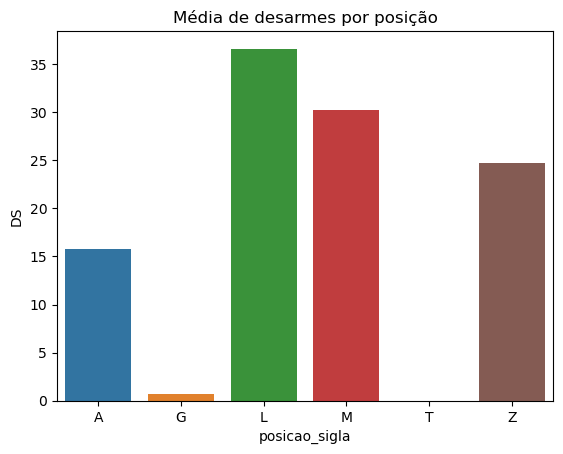

In [24]:
mean_ds_df = cartola_df.groupby('posicao_sigla')[['DS']].mean().reset_index()
sns.barplot(data=mean_ds_df, x='posicao_sigla', y='DS')
plt.title('Média de desarmes por posição')

Text(0.5, 1.0, 'Média de finalizações para fora por posição')

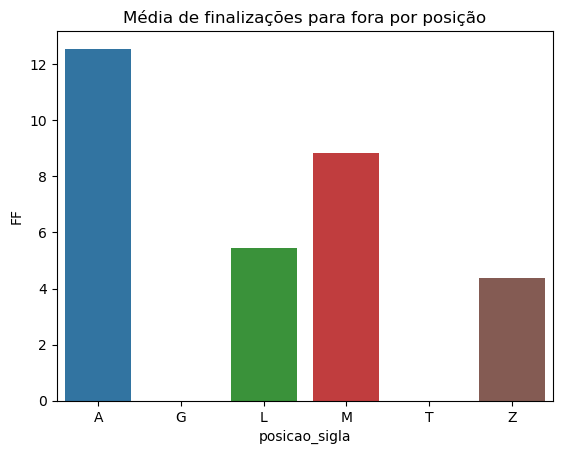

In [25]:
mean_ff_df = cartola_df.groupby('posicao_sigla')[['FF']].mean().reset_index()
sns.barplot(data=mean_ff_df, x='posicao_sigla', y='FF')
plt.title('Média de finalizações para fora por posição')

Text(0.5, 1.0, 'Média de finalizações defendidas por posição')

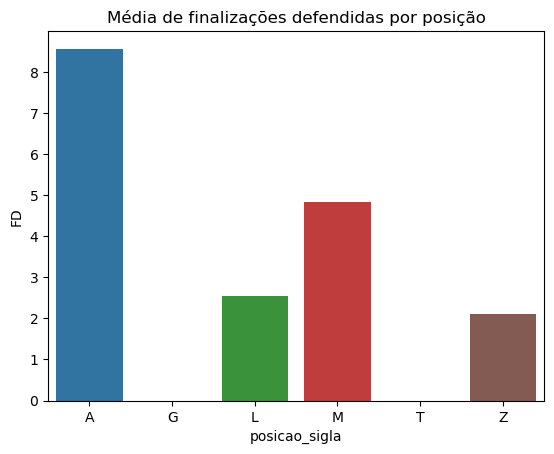

In [26]:
mean_fd_df = cartola_df.groupby('posicao_sigla')[['FD']].mean().reset_index()
sns.barplot(data=mean_fd_df, x='posicao_sigla', y='FD')
plt.title('Média de finalizações defendidas por posição')

Text(0.5, 1.0, 'Média de finalizações na trave por posição')

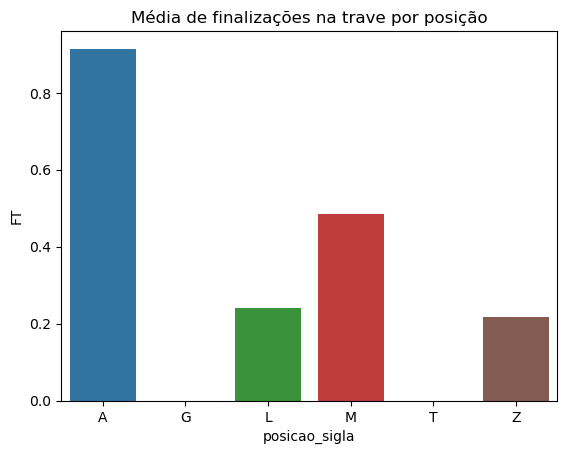

In [27]:
mean_ft_df = cartola_df.groupby('posicao_sigla')[['FT']].mean().reset_index()
sns.barplot(data=mean_ft_df, x='posicao_sigla', y='FT')
plt.title('Média de finalizações na trave por posição')

Text(0.5, 1.0, 'Soma de pontuação total por posição')

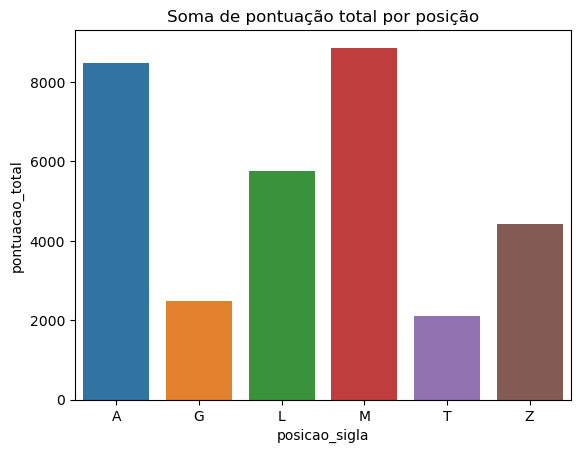

In [28]:
sum_total_pontuacao_df = cartola_df.groupby('posicao_sigla')[['pontuacao_total']].sum().reset_index()
sns.barplot(data=sum_total_pontuacao_df, x='posicao_sigla', y='pontuacao_total')
plt.title('Soma de pontuação total por posição')

Text(0.5, 1.0, 'Média de pontuação total por posição')

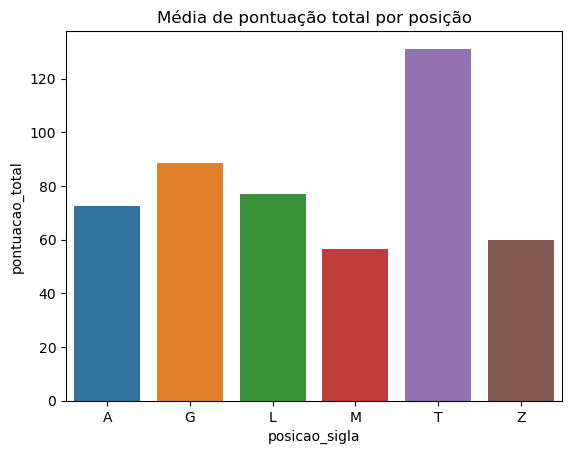

In [29]:
mean_total_pontuacao_df = cartola_df.groupby('posicao_sigla')[['pontuacao_total']].mean().reset_index()
sns.barplot(data=mean_total_pontuacao_df, x='posicao_sigla', y='pontuacao_total')
plt.title('Média de pontuação total por posição')

Text(0.5, 1.0, 'Média de pontuação por rodada por posição')

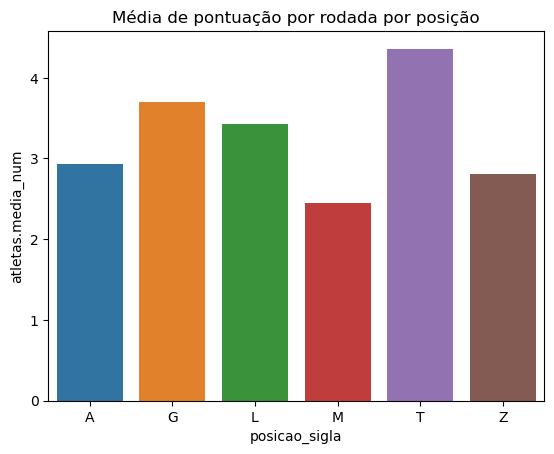

In [30]:
mean_per_game_df = cartola_df.groupby('posicao_sigla')[['atletas.media_num']].mean().reset_index()
sns.barplot(data=mean_per_game_df, x='posicao_sigla', y='atletas.media_num')
plt.title('Média de pontuação por rodada por posição')

Text(0.5, 1.0, 'Dispersão da média dos atletas por seu preço agrupados por posição')

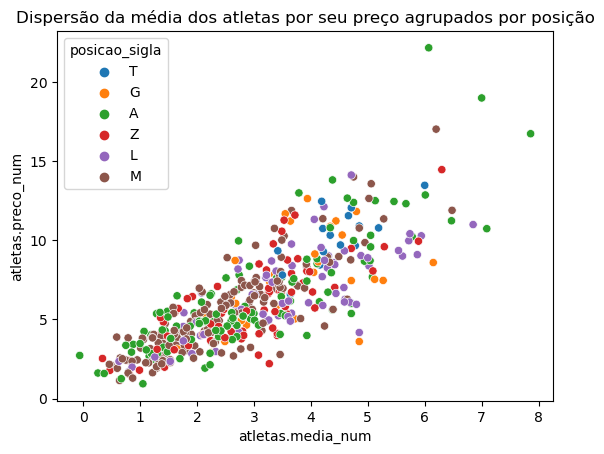

In [31]:
sns.scatterplot(data=cartola_df, x="atletas.media_num", y="atletas.preco_num", hue="posicao_sigla")
plt.title('Dispersão da média dos atletas por seu preço agrupados por posição')

Text(0.5, 1.0, 'Dispersão da média dos atletas por seu preço agrupados por clube')

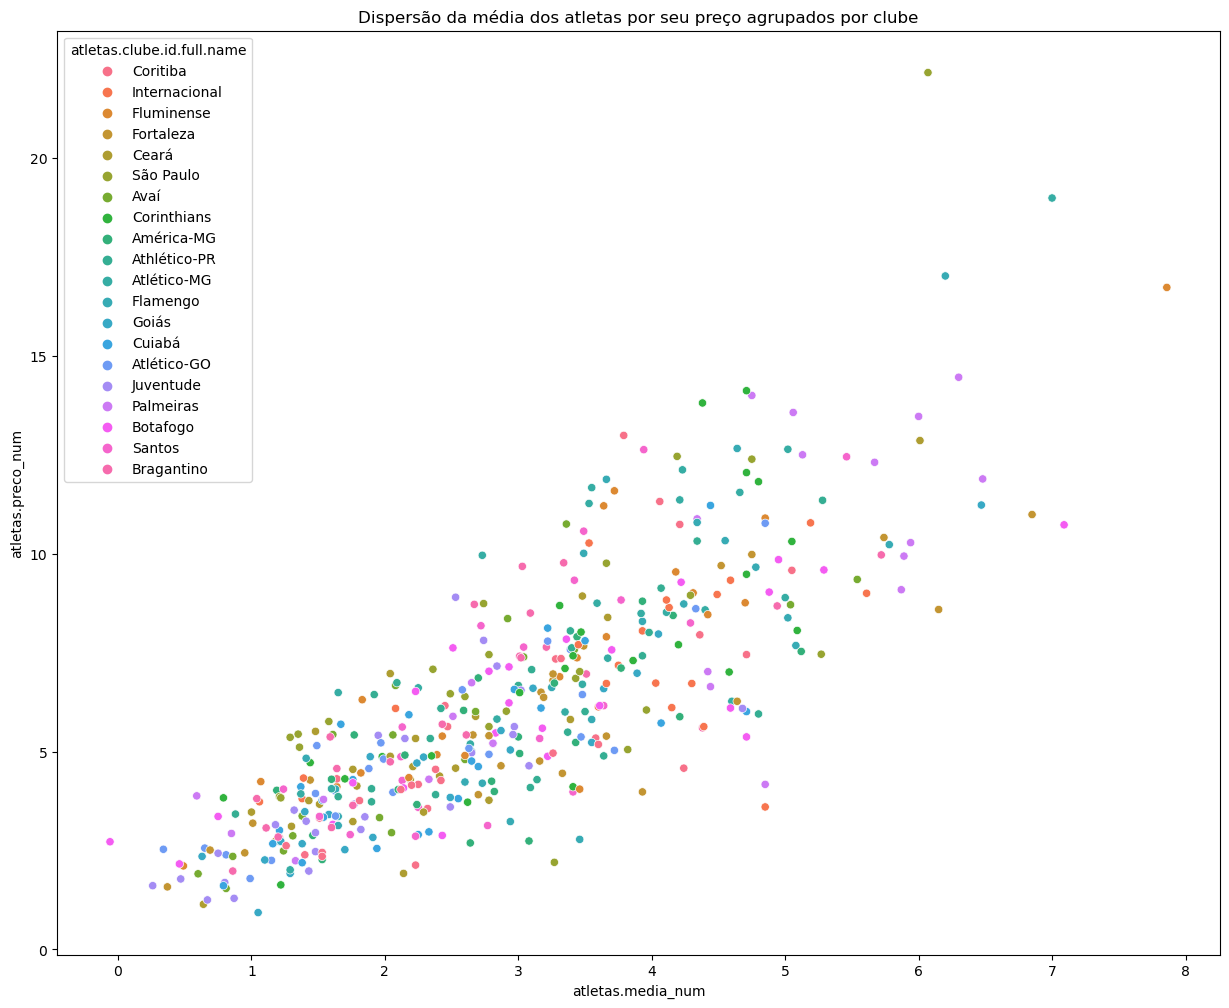

In [32]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.scatterplot(data=cartola_df, x="atletas.media_num", y="atletas.preco_num", hue="atletas.clube.id.full.name")
plt.title('Dispersão da média dos atletas por seu preço agrupados por clube')

## Clusterização dos jogadores

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [34]:
cartola_numbers_df = cartola_df.copy()

In [35]:
cartola_numbers_df

,atletas.apelido,atletas.apelido_abreviado,atletas.slug,atletas.jogos_num,atletas.preco_num,atletas.nome,atletas.media_num,atletas.variacao_num,atletas.clube.id.full.name,atletas.pontos_num,...,PC,FT,PS,DE,GS,GC,PP,DP,posicao_sigla,pontuacao_total
1,Guto Ferreira,G. Ferreira,guto-ferreira,15,10.74,Augusto Sérgio Ferreira,4.21,0.08,Coritiba,3.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T,63.15
2,Mano Menezes,M. Menezes,mano-menezes,34,10.78,Luis Antônio Venker de Menezes,5.19,0.05,Internacional,8.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T,176.46
3,Fábio,Fábio,fabio,37,11.21,Fábio Deivson Lopes Maciel,3.64,0.63,Fluminense,9.50,...,0.0,0.0,0.0,110.0,41.0,0.0,0.0,0.0,G,134.68
4,Marcelo Boeck,M. Boeck,marcelo-boeck,12,4.64,Marcelo Boeck,2.87,0.00,Fortaleza,0.00,...,1.0,0.0,0.0,38.0,17.0,0.0,0.0,0.0,G,34.44
6,Jô,Jô,jo,15,4.62,João Alves de Assis Silva,2.21,0.00,Ceará,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,A,33.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,Luizão,Luizão,luizao,12,2.20,Luiz Gustavo Oliveira da Silva,3.27,0.00,São Paulo,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Z,39.24
797,Pedro Junqueira,P. Junqueira,pedro-junqueira,14,2.52,Pedro Junqueira de Oliveira,1.70,0.00,Goiás,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,23.80
818,Ruan,Ruan,ruan,10,1.25,Ruan Pereira Duarte,0.67,0.11,Juventude,1.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,6.70
819,Rafinha,Rafinha,rafinha,10,1.29,Rafael Pasquali Rech,0.87,0.00,Juventude,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M,8.70


In [36]:
cartola_numbers_df.drop(['atletas.apelido', 'atletas.apelido_abreviado', 'atletas.slug', 'atletas.nome', 'atletas.clube.id.full.name', 'posicao_sigla', 'atletas.minimo_para_valorizar', 'atletas.pontos_num', 'atletas.variacao_num'], axis=1, inplace=True)

In [37]:
cartola_numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 1 to 822
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   atletas.jogos_num  467 non-null    int64  
 1   atletas.preco_num  467 non-null    float64
 2   atletas.media_num  467 non-null    float64
 3   CA                 467 non-null    float64
 4   DS                 467 non-null    float64
 5   FC                 467 non-null    float64
 6   PI                 467 non-null    float64
 7   SG                 467 non-null    float64
 8   CV                 467 non-null    float64
 9   FF                 467 non-null    float64
 10  FS                 467 non-null    float64
 11  G                  467 non-null    float64
 12  I                  467 non-null    float64
 13  A                  467 non-null    float64
 14  FD                 467 non-null    float64
 15  PC                 467 non-null    float64
 16  FT                 467 non

In [38]:
cartola_numbers_df.head()

,atletas.jogos_num,atletas.preco_num,atletas.media_num,CA,DS,FC,PI,SG,CV,FF,...,FD,PC,FT,PS,DE,GS,GC,PP,DP,pontuacao_total
1,15,10.74,4.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.15
2,34,10.78,5.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.46
3,37,11.21,3.64,2.0,0.0,0.0,0.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,110.0,41.0,0.0,0.0,0.0,134.68
4,12,4.64,2.87,2.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,1.0,0.0,0.0,38.0,17.0,0.0,0.0,0.0,34.44
6,15,4.62,2.21,2.0,5.0,18.0,56.0,0.0,1.0,7.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,33.15


In [39]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(cartola_numbers_df)

In [40]:
min(df_scaled[0]), max(df_scaled[0])

(-1.3939420221683874, 1.4964073509694655)

In [41]:
df_scaled

array([[-0.96455464,  1.49640735,  0.91790819, ..., -0.22837003,
        -0.15939818, -0.12237944],
       [ 1.5833743 ,  1.50941753,  1.61728865, ..., -0.22837003,
        -0.15939818,  2.33549172],
       [ 1.98567887,  1.64927695,  0.51112568, ..., -0.22837003,
        -0.15939818,  1.42921816],
       ...,
       [-1.63506225, -1.59025754, -1.60842528, ..., -0.22837003,
        -0.15939818, -1.34686825],
       [-1.63506225, -1.57724736, -1.46569458, ..., -0.22837003,
        -0.15939818, -1.30348512],
       [-1.50096073,  1.03779855,  0.35412191, ..., -0.22837003,
        -0.15939818, -0.67616508]])

In [42]:
wcss_1 = []
range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_scaled)
  wcss_1.append(kmeans.inertia_)

In [43]:
print(wcss_1)

[11208.0, 9054.510273194463, 7837.917715040478, 6887.616548869714, 6452.20787517371, 6056.874132152118, 5795.710201084912, 5512.841683222501, 5250.980507610813, 5029.849236079091, 4846.960712643174, 4691.185438520883, 4461.54552077886, 4375.552625430735, 4260.920000706281, 4106.152692264463, 4047.810462956878, 4012.2959155714916, 3876.431674148048]


Text(0, 0.5, 'WCSS')

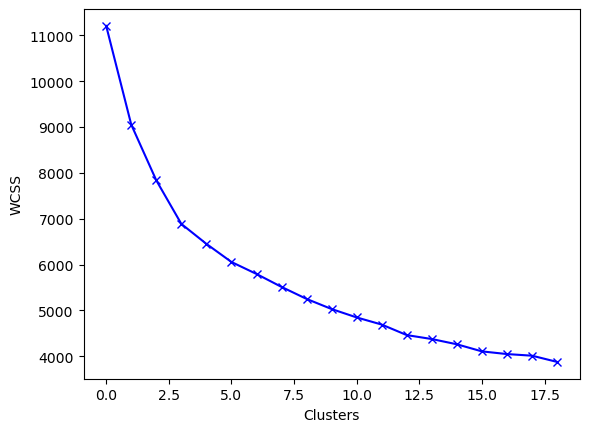

In [44]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

In [45]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [46]:
labels, len(labels)

(array([5, 5, 2, 5, 5, 5, 4, 0, 4, 5, 5, 0, 5, 4, 5, 1, 5, 5, 5, 5, 4, 2,
        5, 5, 5, 5, 5, 4, 3, 5, 2, 5, 0, 5, 5, 1, 2, 0, 5, 4, 0, 5, 5, 5,
        5, 0, 4, 5, 3, 0, 5, 1, 0, 0, 5, 5, 1, 0, 3, 0, 1, 4, 4, 0, 5, 4,
        2, 2, 4, 5, 2, 0, 0, 5, 4, 5, 5, 0, 5, 2, 4, 5, 0, 4, 2, 2, 4, 4,
        5, 5, 1, 5, 4, 5, 2, 4, 5, 2, 5, 5, 5, 0, 2, 1, 5, 4, 4, 4, 5, 0,
        5, 3, 2, 5, 0, 5, 5, 1, 4, 4, 5, 0, 5, 4, 5, 0, 5, 2, 4, 5, 5, 1,
        5, 0, 5, 1, 5, 5, 3, 0, 4, 5, 5, 5, 2, 0, 0, 2, 1, 5, 2, 4, 5, 5,
        1, 1, 5, 0, 5, 5, 1, 5, 5, 5, 0, 0, 1, 5, 2, 5, 4, 0, 5, 4, 0, 5,
        0, 5, 0, 5, 4, 0, 0, 0, 5, 0, 4, 4, 5, 5, 4, 4, 5, 1, 5, 5, 5, 5,
        5, 1, 5, 5, 1, 4, 5, 5, 5, 4, 4, 5, 4, 5, 5, 0, 5, 5, 5, 5, 5, 5,
        5, 1, 1, 1, 0, 5, 5, 5, 5, 0, 5, 5, 5, 2, 0, 3, 2, 5, 1, 5, 3, 0,
        4, 5, 0, 4, 5, 0, 5, 0, 1, 5, 5, 4, 0, 5, 4, 3, 5, 2, 0, 5, 5, 5,
        0, 1, 1, 0, 1, 0, 1, 4, 0, 5, 5, 4, 5, 0, 4, 0, 4, 1, 0, 2, 0, 4,
        4, 5, 5, 4, 5, 3, 5, 4, 5, 4, 

In [47]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([ 97,  37,  24,  12,  77, 220]))

In [48]:
kmeans.cluster_centers_

array([[ 7.44202913e-01,  9.69413260e-02,  9.59559066e-02,
         5.23641106e-01,  7.79195075e-01,  9.13051302e-01,
         5.72088567e-01, -5.70226309e-01,  3.44625792e-01,
         7.48774755e-01,  9.68414130e-01,  2.37906065e-01,
         1.08423615e-01,  4.77341333e-01,  5.61324635e-01,
         2.00230568e-02,  2.91011269e-01,  1.55418647e-01,
        -2.34061227e-01, -2.31869574e-01, -1.69216906e-01,
        -1.84391142e-01, -1.59398178e-01,  3.25493222e-01],
       [ 8.72998663e-01,  1.55205224e+00,  1.51274805e+00,
         5.84085378e-01, -2.84256260e-02,  7.31882761e-01,
         8.97741946e-01, -4.86097693e-01, -1.32235107e-01,
         2.10628633e+00,  1.44766046e+00,  2.44057489e+00,
         2.17924159e+00,  1.15890038e+00,  2.30393389e+00,
        -1.02894846e-01,  1.86106692e+00,  1.08776099e+00,
        -2.34061227e-01, -2.31869574e-01, -1.69216906e-01,
         1.84695805e+00, -1.59398178e-01,  1.65757171e+00],
       [ 3.82048156e-01,  6.32856741e-01,  6.35122983e

In [49]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[cartola_numbers_df.columns])
cluster_centers

,atletas.jogos_num,atletas.preco_num,atletas.media_num,CA,DS,FC,PI,SG,CV,FF,...,FD,PC,FT,PS,DE,GS,GC,PP,DP,pontuacao_total
0,0.744203,0.096941,0.095956,0.523641,0.779195,0.913051,0.572089,-0.570226,0.344626,0.748775,...,0.561325,0.020023,0.291011,0.155419,-0.234061,-0.231870,-0.169217,-0.184391,-0.159398,0.325493
1,0.872999,1.552052,1.512748,0.584085,-0.028426,0.731883,0.897742,-0.486098,-0.132235,2.106286,...,2.303934,-0.102895,1.861067,1.087761,-0.234061,-0.231870,-0.169217,1.846958,-0.159398,1.657572
2,0.382048,0.632857,0.635123,-0.481972,-1.256653,-1.390788,-1.301910,1.324221,-0.431430,-1.012727,...,-0.870030,0.064130,-0.526200,-0.322871,3.983793,3.916638,0.084066,-0.228370,2.942225,0.590984
3,-0.238171,-0.688218,-0.527240,-0.002760,-0.060747,-0.195310,-0.212947,0.463904,0.491087,-0.375988,...,-0.420081,0.856430,-0.148726,-0.322871,-0.234061,-0.231870,5.909575,0.127126,-0.159398,-0.522209
4,0.409551,0.512238,0.623457,0.253478,0.940375,0.326583,0.893416,1.472371,0.057384,-0.229136,...,-0.341611,0.403687,-0.232065,-0.197346,-0.234061,-0.231870,-0.169217,-0.228370,-0.159398,0.567731
5,-0.646978,-0.514552,-0.555462,-0.365099,-0.527502,-0.477590,-0.562277,-0.351924,-0.129515,-0.473195,...,-0.397583,-0.186524,-0.294568,-0.129562,-0.197343,-0.192238,-0.169217,-0.131417,-0.159398,-0.656979


In [50]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[cartola_numbers_df.columns])
cluster_centers

,atletas.jogos_num,atletas.preco_num,atletas.media_num,CA,DS,FC,PI,SG,CV,FF,...,FD,PC,FT,PS,DE,GS,GC,PP,DP,pontuacao_total
0,27.742268,6.437320,3.058247,4.577320,38.402062,30.474227,1.363814e+02,0.226804,3.505155e-01,1.337113e+01,...,7.422680,0.226804,0.721649,2.474227e-01,3.552714e-15,2.220446e-16,3.816392e-17,1.030928e-02,2.081668e-17,83.797320
1,28.702703,10.911081,5.043514,4.729730,23.432432,28.081081,1.600811e+02,0.540541,1.351351e-01,2.367568e+01,...,16.459459,0.162162,2.108108,7.297297e-01,0.000000e+00,-2.220446e-16,-3.469447e-18,4.864865e-01,-1.387779e-17,145.207297
2,25.041667,8.085000,3.813750,2.041667,0.666667,0.041667,5.684342e-14,7.291667,-5.551115e-17,-3.552714e-15,...,0.000000,0.250000,0.000000,5.551115e-17,8.354167e+01,2.950000e+01,4.166667e-02,1.387779e-17,7.500000e-01,96.036667
3,20.416667,4.023333,2.185000,3.250000,22.833333,15.833333,7.925000e+01,4.083333,4.166667e-01,4.833333e+00,...,2.333333,0.666667,0.333333,0.000000e+00,8.881784e-16,2.220446e-16,1.000000e+00,8.333333e-02,6.938894e-18,44.717500
4,25.246753,7.714156,3.797403,3.896104,41.389610,22.727273,1.597662e+02,7.844156,2.207792e-01,5.948052e+00,...,2.740260,0.428571,0.259740,6.493506e-02,2.664535e-15,-8.881784e-16,2.428613e-17,-1.387779e-17,6.938894e-18,94.964675
5,17.368182,4.557273,2.145455,2.336364,14.181818,12.104545,5.382727e+01,1.040909,1.363636e-01,4.095455e+00,...,2.450000,0.118182,0.204545,1.000000e-01,7.272727e-01,2.818182e-01,1.040834e-17,2.272727e-02,-6.245005e-17,38.504500


In [51]:
df_cluster = pd.concat([cartola_df, pd.DataFrame({'cluster' : labels})], axis=1)
df_cluster

,atletas.apelido,atletas.apelido_abreviado,atletas.slug,atletas.jogos_num,atletas.preco_num,atletas.nome,atletas.media_num,atletas.variacao_num,atletas.clube.id.full.name,atletas.pontos_num,...,FT,PS,DE,GS,GC,PP,DP,posicao_sigla,pontuacao_total,cluster
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
1,Guto Ferreira,G. Ferreira,guto-ferreira,15.0,10.74,Augusto Sérgio Ferreira,4.21,0.08,Coritiba,3.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T,63.15,5.0
2,Mano Menezes,M. Menezes,mano-menezes,34.0,10.78,Luis Antônio Venker de Menezes,5.19,0.05,Internacional,8.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T,176.46,2.0
3,Fábio,Fábio,fabio,37.0,11.21,Fábio Deivson Lopes Maciel,3.64,0.63,Fluminense,9.50,...,0.0,0.0,110.0,41.0,0.0,0.0,0.0,G,134.68,5.0
4,Marcelo Boeck,M. Boeck,marcelo-boeck,12.0,4.64,Marcelo Boeck,2.87,0.00,Fortaleza,0.00,...,0.0,0.0,38.0,17.0,0.0,0.0,0.0,G,34.44,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,Luizão,Luizão,luizao,12.0,2.20,Luiz Gustavo Oliveira da Silva,3.27,0.00,São Paulo,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Z,39.24,NaN
797,Pedro Junqueira,P. Junqueira,pedro-junqueira,14.0,2.52,Pedro Junqueira de Oliveira,1.70,0.00,Goiás,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,23.80,NaN
818,Ruan,Ruan,ruan,10.0,1.25,Ruan Pereira Duarte,0.67,0.11,Juventude,1.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,6.70,NaN
819,Rafinha,Rafinha,rafinha,10.0,1.29,Rafael Pasquali Rech,0.87,0.00,Juventude,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M,8.70,NaN


In [52]:
cartola_ordered_df = df_cluster.sort_values(by='cluster')
cartola_ordered_df

,atletas.apelido,atletas.apelido_abreviado,atletas.slug,atletas.jogos_num,atletas.preco_num,atletas.nome,atletas.media_num,atletas.variacao_num,atletas.clube.id.full.name,atletas.pontos_num,...,FT,PS,DE,GS,GC,PP,DP,posicao_sigla,pontuacao_total,cluster
321,Keiller,Keiller,keiller,14.0,3.60,Keiller da Silva Nunes,4.85,0.28,Internacional,7.50,...,0.0,0.0,42.0,10.0,0.0,0.0,0.0,G,67.90,0.0
183,Marcos Guilherme,M. Guilherme,marcos-guilherme,15.0,5.36,Marcos Guilherme de Almeida Santos Matos,1.29,1.42,São Paulo,9.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,19.35,0.0
185,Guilherme Parede,G. Parede,guilherme-parede,16.0,3.67,Guilherme Parede Pinheiro,1.77,1.44,Juventude,9.40,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,A,28.32,0.0
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
378,Pedro Raul,P. Raul,pedro-raul,33.0,11.23,Pedro Raul Garay da Silva,6.47,0.00,Goiás,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,A,213.51,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,Luizão,Luizão,luizao,12.0,2.20,Luiz Gustavo Oliveira da Silva,3.27,0.00,São Paulo,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Z,39.24,NaN
797,Pedro Junqueira,P. Junqueira,pedro-junqueira,14.0,2.52,Pedro Junqueira de Oliveira,1.70,0.00,Goiás,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,23.80,NaN
818,Ruan,Ruan,ruan,10.0,1.25,Ruan Pereira Duarte,0.67,0.11,Juventude,1.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,6.70,NaN
819,Rafinha,Rafinha,rafinha,10.0,1.29,Rafael Pasquali Rech,0.87,0.00,Juventude,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M,8.70,NaN


In [53]:
cartola_ordered_df.dropna(axis=0, inplace=True)

In [54]:
cartola_ordered_df

,atletas.apelido,atletas.apelido_abreviado,atletas.slug,atletas.jogos_num,atletas.preco_num,atletas.nome,atletas.media_num,atletas.variacao_num,atletas.clube.id.full.name,atletas.pontos_num,...,FT,PS,DE,GS,GC,PP,DP,posicao_sigla,pontuacao_total,cluster
321,Keiller,Keiller,keiller,14.0,3.60,Keiller da Silva Nunes,4.85,0.28,Internacional,7.5,...,0.0,0.0,42.0,10.0,0.0,0.0,0.0,G,67.90,0.0
183,Marcos Guilherme,M. Guilherme,marcos-guilherme,15.0,5.36,Marcos Guilherme de Almeida Santos Matos,1.29,1.42,São Paulo,9.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,19.35,0.0
185,Guilherme Parede,G. Parede,guilherme-parede,16.0,3.67,Guilherme Parede Pinheiro,1.77,1.44,Juventude,9.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,A,28.32,0.0
378,Pedro Raul,P. Raul,pedro-raul,33.0,11.23,Pedro Raul Garay da Silva,6.47,0.00,Goiás,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,A,213.51,0.0
374,Luís Oyama,L. Oyama,luis-oyama,16.0,7.14,Luís Felipe Oyama,2.93,0.00,Botafogo,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M,46.88,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Natanael,Natanael,natanael,13.0,9.35,Natanael Batista Pimenta,5.54,0.00,Avaí,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,L,72.02,5.0
205,Hyoran,Hyoran,hyoran,25.0,6.96,Hyoran Kaue Dalmoro,3.51,-0.36,Bragantino,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,M,87.75,5.0
204,Léo,Léo,leo,26.0,5.11,Leonardo Pinheiro da Conceição,1.36,0.88,São Paulo,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Z,35.36,5.0
322,Cleiton,Cleiton,cleiton,35.0,8.72,Cleiton Schwengber,2.67,-0.84,Bragantino,2.0,...,0.0,0.0,108.0,55.0,1.0,0.0,1.0,G,93.45,5.0


In [55]:
cartola_ordered_df.to_excel('cartola_clustered.xlsx')